<center> <h3>University of Puerto Rico</h3> </center>
<center> <h3>Mayagüez Campus</h3> </center>
<center> <h3>Mayagüez, Puerto Rico</h3> </center>


<center> <h3>Department of Electrical and Computer Engineering</h3> </center>


<center> <h3>Programming assignment 2</h3> </center>


<center> <h3>by</h3> </center>
<center> <h3>Group M</h3> </center>
<center> <h3>Jan A. Rivera R.</h3> </center>
<center> <h3>Diego F. Vasquez P.</h3> </center>


<center> <h3>For: Professor Fernando Vega Riveros</h3> </center>
<center> <h3>Course: ICOM 5015</h3> </center>
<center> <h3>Date: April 01, 2024</h3> </center>


---

### Programming assignment 2


---
1. Exercise 3.9 · AIMA Exercises (aimacode.github.io) (problem 3.7 of the Russell, S. and Norvig, P. Artificial Intelligence: A Modern Approach. 3rd Edition)

Consider the problem of finding the shortest path between two points on a plane that has convex polygonal obstacles as shown in . This is an idealization of the problem that a robot has to solve to navigate in a crowded environment.

1.1 Suppose the state space consists of all positions (x,y) in the plane. How many states are there? How many paths are there to the goal?



The state space in this scenario would be theb set of all the nodes in the graph. Therefore it is infinite. This also means that the paths to get to the goal vertex would be infinite as well.

---
1.2. Explain briefly why the shortest path from one polygon vertex to any other in the scene must consist of straight-line segments joining some of the vertices of the polygons. Define a good state space now. How large is this state space?


The shortest path from one point to aonther in a flat plane is known to be a straight line. Therefore the shortest path from the start vertex to the goal vertex would be a straight line as close a possible to the obstavle without actually colliding. The state space should include the vertices that make up the polygons, the start and goal vertices.

---
1.3. Define the necessary functions to implement the search problem, including an function that takes a vertex as input and returns a set of vectors, each of which maps the current vertex to one of the vertices that can be reached in a straight line. (Do not forget the neighbors on the same polygon.) Use the straight-line distance for the heuristic function.


- Actions Function: This function takes a vertex as input and outputs all vertices that can be reached in a straight line. This set includes neighboring vertices on the same polygon.
- Straight Line Heuristic Function (hSLD): Uses the straight-line distance between the current vertex and the goal vertex as the heuristic.
- Optimal Result Algorithm: An algorithm (such as A* or GBFS) that selects the best path based on the heuristic and cost so far.
- Polygon Check Function: Determines whether a point is inside a polygon to avoid collisions.

**Implementation in Python**

The implementation involves defining the outside_poly, hSLD, ACTIONS, and the search algorithms A_STAR and GBFS.
outside_poly Function

Checks if a point is outside a given polygon. It's essential for determining valid movements that don't intersect obstacles.
hSLD Function

Calculates the heuristic based on the straight-line distance to the goal, facilitating the heuristic-guided search.
ACTIONS Function

Generates all possible actions from a given state, considering only movements that maintain a clear line of sight to the next vertex without crossing polygon boundaries.
A* Search (A_STAR) and Greedy Best-First Search (GBFS)

Both algorithms are implemented to find the shortest path from the start vertex to the goal vertex, utilizing the hSLD for the heuristic and ACTIONS to generate successors.

---
1.4. Apply one or more of the algorithms in this chapter to solve a range of problems in the domain, and comment on their performance.

#### A_STAR:

In [24]:
import math
import heapq
import time

x_goal = 6
y_goal = 3
v_goal = (x_goal, y_goal)

obstacles = [
    [(1, 1), (3, 1), (3, 3), (1, 3)],                    
    [(6, 6), (8, 6), (8, 8), (6, 8), (7, 9)],             
    [(10, 10), (12, 10), (13, 12), (11, 13), (9, 12)],    
]


def outside_poly(point, polygon):
    x, y = point
    n = len(polygon)
    inside = False
    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y
    return inside


def hSLD(v, v_goal):
    x, y = v
    x_goal, y_goal = v_goal
    return math.sqrt((x_goal - x)*(x_goal - x) + (y_goal - y)*(y_goal - y))

# Define the ACTIONS function
def ACTIONS(v):
    x, y = v
    
    possible_actions = set()
    for i in range(-1, 2):
        for j in range(-1, 2):
            if i != 0 or j != 0:  
                new_v = (x + i, y + j)
                if all(not outside_poly(new_v, obstacle) for obstacle in obstacles):
                    possible_actions.add(new_v)
    return possible_actions

def A_STAR(v_start, v_goal):
  
    frontier = [(0, v_start, 0, [])]  
    cost_so_far = {v_start: 0}
    
    start_time = time.time()  # Start time
    
    while frontier:
        
        current_cost, current_v, count, actions_taken = heapq.heappop(frontier)
        
        
        if current_v == v_goal:
            end_time = time.time()  
            processing_time = end_time - start_time  
            return count, actions_taken, processing_time
        
       
        for next_v in ACTIONS(current_v):
            
            new_cost = cost_so_far[current_v] + 1 + hSLD(next_v, v_goal)
            
            
            if next_v not in cost_so_far or new_cost < cost_so_far[next_v]:
                
                cost_so_far[next_v] = new_cost
               
                priority = new_cost
                heapq.heappush(frontier, (priority, next_v, count + 1, actions_taken + [next_v]))
                
   
    end_time = time.time()  
    processing_time = end_time - start_time 
    return float('inf'), [], processing_time


v_start = (0, 0)
count, actions_taken, processing_time = A_STAR(v_start, v_goal)
print("Total Actions Used:", count)
print("Actions Taken:")
for i, action in enumerate(actions_taken):
    print(f"Step {i+1}: Go to {action}")
print("Processing Time:", processing_time, "seconds")

Total Actions Used: 6
Actions Taken:
Step 1: Go to (1, 1)
Step 2: Go to (2, 1)
Step 3: Go to (3, 1)
Step 4: Go to (4, 2)
Step 5: Go to (5, 3)
Step 6: Go to (6, 3)
Processing Time: 0.0019073486328125 seconds


How they get their result

A_STAR:

    Uses both the cumulative cost so far and a heuristic (straight-line distance) to estimate the cost from the current node to the target.
    It ensures finding the shortest path by considering both the cost to reach a node and the estimated cost to reach the target from that node.

#### GBFS

In [17]:
import heapq
import math
import time

x_goal = 6
y_goal = 3
v_goal = (x_goal, y_goal)

obstacles = [
    [(1, 1), (3, 1), (3, 3), (1, 3)],                     
    [(6, 6), (8, 6), (8, 8), (6, 8), (7, 9)],             
    [(10, 10), (12, 10), (13, 12), (11, 13), (9, 12)],    
]


def outside_poly(point, polygon):
    x, y = point
    n = len(polygon)
    inside = False
    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y
    return inside


def hSLD(v, v_goal):
    x, y = v
    x_goal, y_goal = v_goal
    return math.sqrt((x_goal - x)*(x_goal - x) + (y_goal - y)*(y_goal - y))


def ACTIONS(v):
    x, y = v
    
    possible_actions = set()
    for i in range(-1, 2):
        for j in range(-1, 2):
            if i != 0 or j != 0:  
                new_vertex = (x + i, y + j)
                if all(not outside_poly(new_vertex, obstacle) for obstacle in obstacles):
                    possible_actions.add(new_vertex)
    return possible_actions


def GBFS(v_start, v_goal):
    
    frontier = [(hSLD(v_start, v_goal), v_start)]  
    
    visited = set([v_start])
    counter = 0  
    
    start_time = time.time()  
    
    while frontier:
        
        _, v_current = heapq.heappop(frontier)
        
       
        if v_current == v_goal:
            end_time = time.time()  
            processing_time = end_time - start_time 
            return counter, processing_time
        
        for v_next in ACTIONS(v_current):
            if v_next not in visited:
                visited.add(v_next)
                heapq.heappush(frontier, (hSLD(v_next, v_goal), v_next))
                counter += 1  
                
    end_time = time.time() 
    processing_time = end_time - start_time 
    return float('inf'), processing_time

v_start = (0, 0)
action_count, processing_time = GBFS(v_start, v_goal)
print("Total Actions Used:", action_count)
print("Processing Time:", processing_time, "seconds")


Total Actions Used: 26
Processing Time: 0.0002627372741699219 seconds


How they get their result

    It only uses heuristics (straight line distance) to determine the next node to visit.
    It does not guarantee the shortest path as it does not consider the cumulative cost to reach each node, which may lead to suboptimal solutions.

#### plot 

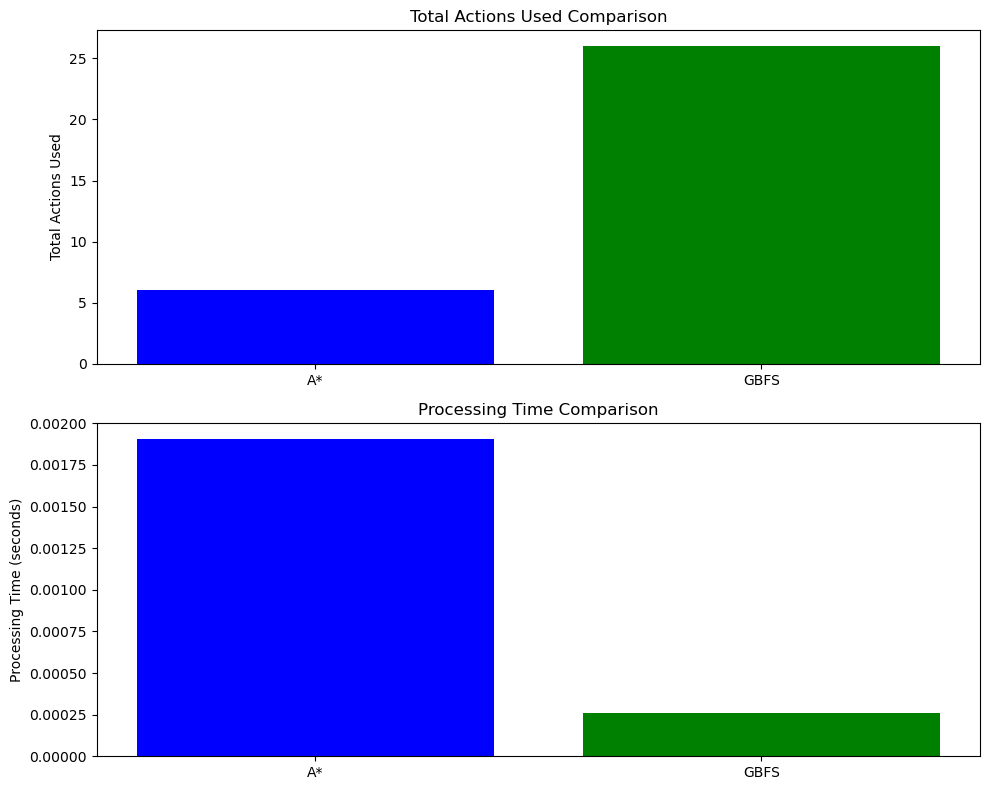

In [32]:
import matplotlib.pyplot as plt

# Data for A* and GBFS algorithms
actions_data = [6, 26]  # Total actions used for A* and GBFS
time_data = [0.0019073486328125, 0.0002627372741699219]  # Processing time for A* and GBFS

# Labels for the bars
labels = ['A*', 'GBFS']

# Create subplots for the comparison
fig, axs = plt.subplots(2, figsize=(10, 8))

# Plot for the total actions used comparison
axs[0].bar(labels, actions_data, color=['blue', 'green'])
axs[0].set_title('Total Actions Used Comparison')
axs[0].set_ylabel('Total Actions Used')

# Plot for the processing time comparison
axs[1].bar(labels, time_data, color=['blue', 'green'])
axs[1].set_title('Processing Time Comparison')
axs[1].set_ylabel('Processing Time (seconds)')

# Layout adjustment and plotting
plt.tight_layout()
plt.show()

#### analysis of results

    Total Actions Used Comparison:
        The blue bar (A*) is significantly lower than the green bar (GBFS), indicating that A* used fewer actions to reach the goal.

    Processing Time Comparison:
        The blue bar (A*) is much higher than the green bar (GBFS), showing that A* took a longer time to process compared to GBFS.

These results suggest that while A* was more efficient in terms of the path (fewer actions to reach the goal), it took longer to compute than GBFS. On the other hand, GBFS was quicker but required more actions, which might indicate a less efficient path.

Considering these outcomes:

    A* is typically more suitable when the shortest path is the priority, despite taking longer to compute.
    GBFS may be preferable when a faster computation is necessary, and the shortest path is less critical.

---
---
2. Exercise 3.11 Search Exercises · AIMA Exercises (aimacode.github.io) ( 3.9 of the Russell, S. and Norvig, P. Artificial Intelligence: A Modern Approach. 3rd Edition)

The missionaries and cannibals problem is usually stated as follows. 
Three missionaries and three cannibals are on one side of a river, along with a boat that can hold one or two people. Find a way to get everyone to the other side without ever leaving a group of missionaries in one place outnumbered by the cannibals in that place. This problem is famous in AI because it was the subject of the first paper that approached problem formulation from an analytical viewpoint (Amarel, 1968).


a. Formulate the problem precisely, making only those distinctions necessary to ensure a valid solution. Draw a diagram of the complete state space.

1. To formulate the missionaries and cannibals problem precisely, we define the following:

    State: Represented by a tuple (M, C, B), where:
        
        * M is the number of missionaries on the initial side of the river.
        * C is the number of cannibals on the initial side of the river.
        * B indicates which side of the river the boat is on. We use (0) for the initial side and (1) for the other side.


2. Identifying Valid States

    A state is valid if and only if:

        * The number of missionaries and cannibals on each side of the river is between 0 and 3.
        * Missionaries are not in the minority on any side of the river, unless there are no missionaries on that side.


3. Drawing the States:

Next cell.


4. Connecting States with Actions

Possible actions include moving 1 or 2 missionaries, 1 or 2 cannibals, or 1 missionary and 1 cannibal from one side of the river to the other. For each state, consider all possible actions and draw an arrow to each valid resulting state. Make sure the action does not lead to an invalid state according to the problem's restrictions.


5. Reviewing Repetitions

Considering that: 
The initial state is (3, 3, 0) and the target state is (0, 0, 1).

    Actions: Possible actions include crossing the river with 1 or 2 people in the boat, which can be missionaries, cannibals, or both. Actions can be represented as (m, c), indicating how many missionaries and cannibals cross.

    Restrictions: In any state, the number of missionaries on one side must not be less than the number of cannibals on that side, unless there are no missionaries on that side. This must be met both on the initial side and at the destination.


The optimal sequence of movements to solve the problem of the missionaries and cannibals, from the initial state to the target state, is as follows:

| number      | start  | end     |Description|
|-------------|--------|---------|-----------|
| iteration   | M-C-B  | M-C-B   |-----------|
| 0           | 3-3-0  | 0-0-0   |initial state|
| 1           | 3-1-1  | 0-2-1   |→ Two cannibals cross the river|
| 2           | 3-2-0  | 0-1-0   |← One cannibal returns|
| 3           | 3-0-1  | 0-3-1   |→ Two cannibals cross the river|
| 4           | 3-1-0  | 0-2-0   |← One cannibal returns|
| 5           | 1-1-1  | 2-2-1   |→ Two missionaries cross the river|
| 6           | 2-2-0  | 1-1-0   |← One missionary and one cannibal return|
| 7           | 0-2-1  | 3-1-1   |→ Two missionaries cross the river|
| 8           | 0-3-0  | 3-0-0   |← One cannibal returns|
| 9           | 0-1-1  | 3-2-1   |→ Two cannibals cross the river|
| 10          | 1-1-0  | 2-2-0   |← One missionary returns|
| 11          | 0-0-1  | 3-3-1   |→ One missionary and one cannibal cross the river|

Each step shows the state after the movement, represented by a tuple (M, C, B) where M is the number of missionaries on the initial side of the river, C is the number of cannibals on the initial side, and B indicates the side of the river where the boat is (0 for the initial side and 1 for the other side). The arrows indicate the direction of the boat's movement.

#### Nodes with Possible States

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

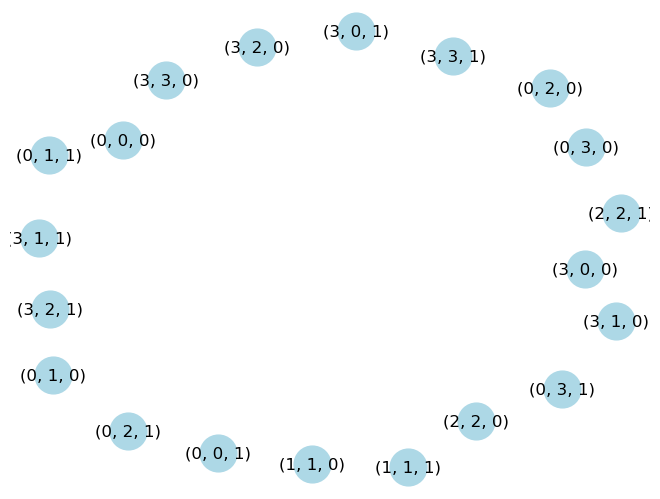

In [2]:
# Create a directed graph
G = nx.DiGraph()

# Define a list of all possible states
states = [(m, c, b) for m in range(4) for c in range(4) for b in range(2) if (m == 0 or m >= c) and (3-m == 0 or 3-m >= 3-c)]

# Add nodes to the graph for each valid state
for state in states:
    G.add_node(state)

# Define and add transitions between states as edges in the graph
for state in states:
    M, C, B = state
    # Add your logic here to connect states with edges according to the problem's rules

# Here you need to define the logic to add edges according to possible actions

# Draw the graph
pos = nx.spring_layout(G)  # Node positioning
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue')
plt.show()

---
b. Implement and solve the problem optimally using an appropriate search algorithm. Is it a good idea to check for repeated states?

Implementation and Solution

To solve this problem, we apply a search algorithm defined as BFS (Breadth-First Search), as it guarantees to find the optimal solution in terms of the smallest number of crossings. It's a good idea to check for repeated states to avoid cycles and improve efficiency.

We implement it in Python, taking into account the verification of repeated states:

In [3]:
import time
from collections import deque  # Import the deque class from the collections module

In [10]:

start_time = time.time()


def is_valid(M, C, B):
    """
    Checks if the state (M, C, B) is valid according to the game rules
    """
    # Check if the number of missionaries or cannibals is negative or greater than 3
    if M < 0 or C < 0 or M > 3 or C > 3 or (B != 0 and B != 1):
        return False

    # Check if there are more cannibals than missionaries on either side
    if (M < C and M > 0) or (3-M < 3-C and 3-M > 0):
        return False

    # If all conditions are met, the state is valid
    return True

def successors(state):
    """
    Generates a list of all valid successor states from a given state
    """
    M, C, B = state  # Unpack the state into M, C, and B variables

    # Define the movement options based on the boat's position
    if B == 0:  # Boat on the initial side
        options = [(-1, 0, 1), (-2, 0, 1), (0, -1, 1), (0, -2, 1), (-1, -1, 1)]
    else:  # Boat on the other side
        options = [(1, 0, 0), (2, 0, 0), (0, 1, 0), (0, 2, 0), (1, 1, 0)]

    # Generate a list comprehension with valid successor states
    return [(M+m, C+c, b) for m, c, b in options if is_valid(M+m, C+c, b)]

def bfs():
    """
    The BFS (Breadth-First Search) algorithm is implemented to find a solution to the problem.
    """
    start = (3, 3, 0)  # Initial state: 3 missionaries, 3 cannibals, boat on initial side
    goal = (0, 0, 1)  # Goal state: 0 missionaries, 0 cannibals, boat on other side

    queue = deque([start])  # Initialize the queue with the start state
    visited = set([start])  # Set to keep track of visited states
    path = {start: None}  # Dictionary to store the parents of each state

    while queue:
        state = queue.popleft()  # Remove the next state from the queue

        if state == goal:
            # If the goal state is reached, reconstruct the solution path
            solution = []
            while state:
                solution.append(state)
                state = path[state]
            return solution[::-1]  # Return the reversed solution

        # Generate the successors of the current state
        for neighbor in successors(state):
            if neighbor not in visited:
                visited.add(neighbor)  # Mark the successor as visited
                path[neighbor] = state  # Record the parent of the successor
                queue.append(neighbor)  # Add the successor to the queue

    # If no solution is found, return an empty list
    return []

# Run the BFS algorithm and get the solution
solution = bfs()
solution

end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")

Tiempo de ejecución: 0.0003199577331542969 segundos


In [11]:
# Print BFS solution

solution

[(3, 3, 0),
 (3, 1, 1),
 (3, 2, 0),
 (3, 0, 1),
 (3, 1, 0),
 (1, 1, 1),
 (2, 2, 0),
 (0, 2, 1),
 (0, 3, 0),
 (0, 1, 1),
 (1, 1, 0),
 (0, 0, 1)]

# Performance Measurement across Multiple Iterations

Execution Time 1: 0.0008144378662109375 seconds

Execution Time 2: 0.0003533363342285156 seconds

Execution Time 3: 0.00036454200744628906 seconds

Execution Time 4: 0.0009312629699707031 seconds

Execution Time 5: 0.0003199577331542969 seconds

In [2]:
#plot
import matplotlib.pyplot as plt

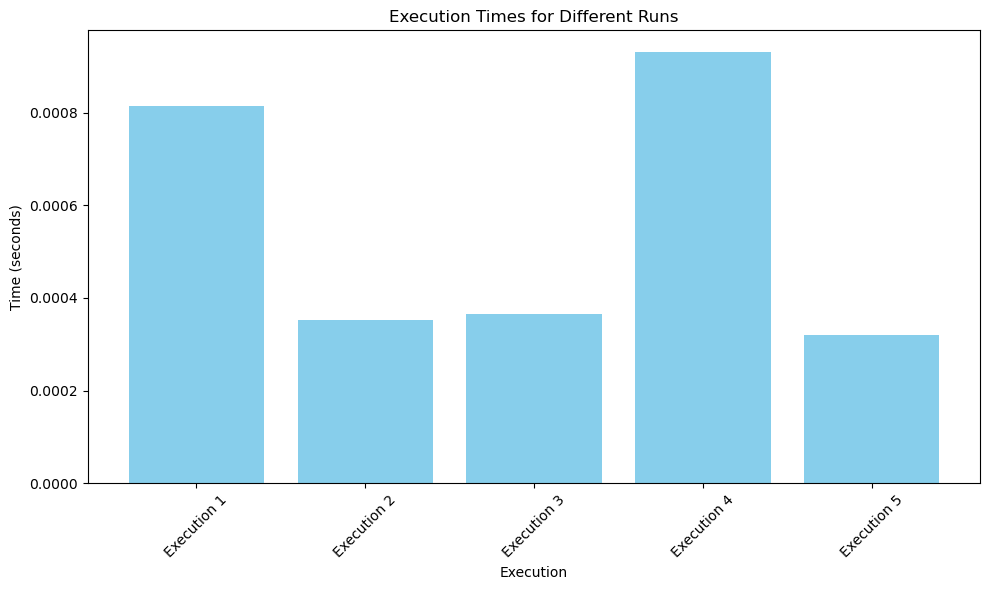

In [3]:
# Execution times
times = [
    0.0008144378662109375,
    0.0003533363342285156,
    0.00036454200744628906,
    0.0009312629699707031,
    0.0003199577331542969
]

# Identifiers for each execution time
identifiers = ['Execution 1', 'Execution 2', 'Execution 3', 'Execution 4', 'Execution 5']

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(identifiers, times, color='skyblue')

plt.title('Execution Times for Different Runs')
plt.xlabel('Execution')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Is it a good idea to check for repeated states?

Yes, it's a good idea to check for repeated states when implementing and solving a problem using a search algorithm. Checking for repeated states helps in several ways:

    Reduces Computational Effort: By ensuring that the algorithm does not explore the same state more than once, you reduce unnecessary computational work. This is particularly important in large state spaces where re-exploring states can significantly increase the time to find a solution.

    Prevents Infinite Loops: In some problems, especially those involving graphs or complex state transitions, not checking for repeated states can lead to infinite loops. This occurs when the algorithm keeps cycling between a set of states without making progress towards the goal.

    Improves Efficiency: Eliminating repeated states from the search process makes the search algorithm more efficient by focusing only on new, unexplored states. This can lead to a faster discovery of the solution.

    Optimizes Memory Usage: Keeping track of visited states and avoiding their re-exploration helps in managing memory use more effectively. This is crucial for problems with a vast number of potential states, where memory resources can become a limiting factor.



---
c. Why do you think people have a hard time solving this puzzle, given that the state space is so simple?

Despite the problem seeming simple, there are many difficulties with this exercise due to various reasons:

* Counter-intuitive Restrictions: The condition that missionaries cannot be outnumbered may not be immediately obvious or easy to mentally maintain while considering movements.

* Exploration of the State Space: Without a clear strategy, it's easy to get lost in the state space or follow paths that do not lead to the goal, especially if you try to solve the problem mentally without drawing the state space.

* Memory and Attention Capacity: Keeping a mental record of the data, states on each side, and possible paths can be challenging, which took us several hours to resolve.

The problem requires systematic exploration of the state space and the maintenance of specific constraints, which can make analysis and solutions challenging.

---

#### How BFS Achieves Its Goal


Reaching the optimal number of iterations in the missionaries and cannibals problem using the Breadth-First Search (BFS) algorithm involves systematically exploring the state space until finding the shortest possible solution without breaking the problem's rules. Here's how the BFS algorithm achieves this in 12 iterations:

1. Level-by-Level Exploration: BFS explores the state space level by level, meaning it first examines all states one move away from the initial state, then all states two moves away, and so on. This ensures that if a solution exists, BFS will find the shortest possible solution, as it stops searching as soon as it reaches the goal state.

2. Generation of Successors: For each state, the algorithm generates all possible "successors," i.e., states that are reachable from the current state through a single allowed action (crossing one or two missionaries/cannibals). In doing so, BFS constructs a search tree in which each node represents a state and each edge represents an action.

3. Rule Verification: At each step, the algorithm checks that the generated states comply with the problem's rules (never leaving more cannibals than missionaries on one side of the river, unless there are no missionaries on that side). This ensures that only valid paths to the solution are explored.

4. Checking for Repeated States: To improve its efficiency, BFS checks if a generated state has already been visited or is in the queue to be explored. If so, the state is discarded to avoid loops or redundant explorations. This is crucial for achieving the solution optimally.

5. Reaching the Goal State: The process continues until the goal state is found. Since BFS explores states in order of their distance from the initial state, it ensures that the first time the goal state is reached is through the shortest possible path. In the case of the missionaries and cannibals problem, this happens after 12 iterations, meaning BFS has found the shortest sequence of actions that safely take all missionaries and cannibals to the other side of the river.


The effectiveness of BFS for this problem lies in its exhaustive and methodical nature in exploring the state space, ensuring that the most efficient solution is found without overlooking any possibilities. The key to success in 12 iterations is the combination of systematically generating all possible successors, verifying the rules to ensure that the movements are valid, and avoiding the re-exploration of states, which guides the algorithm directly to the optimal solution.

---

Conclusions

The A-star search algorithim relies on knowing the cost of the nodes it has used, and the estimated cost to get to the goal. The best first search algorithim simply takes into account the next best option. For this reason the best first search algorithim has proven to be faster in time, but since it only evaluated the nest best choice, suffer greatly in action costs. This search algorithim will get you to the goal, albeit in a less optmized route. Depending on what your goals are, you must consider whether the final route must be optimized or if the rooute you need just needs to reach the goal.

By defining a precise state space, employing effective heuristics, and utilizing advanced search algorithms, the problem of navigating a robot through a plane with obstacles can be solved efficiently. The choice between A* and GBFS depends on the specific requirements for optimality versus computational resources and execution time.

The use of the Breadth-First Search algorithm has proven to be an effective strategy for finding the optimal solution to the problem. By systematically exploring all levels of the search tree before moving to the next level, BFS ensures that the first solution found is one of the most efficient in terms of steps or crossings required.

Checking for repeated states is a good practice in search algorithms as it enhances efficiency, prevents potential issues like infinite loops, and optimizes computational and memory resources.

The success of BFS in this specific problem illustrates its potential applicability to other similar problems. However, it is important to assess the unique characteristics of each problem, such as the size of the state space and specific constraints, to choose the most appropriate search algorithm.

The practical implementation of the algorithm requires attention to detail, such as efficient state representation, generation of valid successors, and reconstruction of the path to the solution. These challenges highlight the importance of programming skills and algorithmic thinking in artificial intelligence.

The project has been an opportunity to delve into problem-solving techniques using search algorithms. It has demonstrated the importance of careful problem formulation, selection of a suitable algorithm, and efficient management of computational resources.

---


<center> <h3>References</h3> </center>


[1] S. J. Russell and P. Norvig, Artificial Intelligence: A Modern Approach. Upper Saddle River: Prentice-Hall, 2010. 

[2] P. Norvig, “Aimacode,” GitHub, https://github.com/aimacode (accessed Mar. 8, 2024). 

[3] "Visualgo - Graph Traversal: Depth-First Search & Breadth-First Search," Visualgo.net. [online]: https://visualgo.net/en/dfsbfs. (accessed Mar. 30, 2024).

[4] Python Software Foundation, "collections — Container datatypes," in Python 3.12.2 Documentation. [online]: https://docs.python.org/3/library/collections.html#collections.deque. (accessed Mar. 30, 2024). 

[5] “A* search,” Brilliant Math & Science Wiki, https://brilliant.org/wiki/a-star-search/#:~:text=References-,The%20A*%20Algorithm,a%20path%20using%20that%20node. (accessed Apr. 1, 2024).

[6] K. Ru, Introduction to Artificial Intelligence, https://www.cs.nott.ac.uk/~pszrq/files/5IAIheuristic.pdf (accessed Apr. 1, 2024).

